In [0]:
import pandas as pd
import numpy as np 

import matplotlib as mp
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

import seaborn as sns
sns.set(style="whitegrid")
sns.set(font_scale=2)

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
from google.cloud import bigquery
client = bigquery.Client('thesisprojects2019')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Average Dwelling Time - Plots

### Violin Plot for each event

In [0]:
#import statistic table from bigquery
query = """ SELECT eventid, venueid, event, avg_dwelltime_min
                 FROM  `thesisprojects2019.audeMS.prediction_spectators_final`
                 ORDER BY venueid, eventid, avg_dwelltime_min """
data = client.query(query).to_dataframe()

In [0]:
data = data[data['avg_dwelltime_min'] <= 480.0]
data.head(2)

,eventid,venueid,event,avg_dwelltime_min
0,1_2017-11-04,1,Barbarians New Zealand,55.5
1,1_2017-11-04,1,Barbarians New Zealand,58.0


In [0]:
# create space between stadium
data1 = data[data['venueid']==1]
new_data1 = pd.DataFrame([[0] * len(data.columns)], columns=data.columns)
data1 = data1.append(new_data1, ignore_index=True)
data1 = data1.replace({'event':0},{'event':'-'})

data2 = data[data['venueid']==2]
new_data2 = pd.DataFrame([[0] * len(data.columns)], columns=data.columns)
data2 = data2.append(new_data2, ignore_index=True)
data2 = data2.replace({'event':0},{'event':'--'})

data3 = data[data['venueid']==3]
new_data3 = pd.DataFrame([[0] * len(data.columns)], columns=data.columns)
data3 = data3.append(new_data3, ignore_index=True)
data3 = data3.replace({'event':0},{'event':'---'})

data4 = data[data['venueid']==4]

list_df = [data2,data3,data4]
new_data = data1.append(list_df,ignore_index=True )

In [0]:
data.groupby('event')['avg_dwelltime_min'].mean()

event
Barbarians New Zealand       108.524523
England Argentina            108.793668
England Australia            113.093798
England Germany               97.179220
England Samoa                109.378995
England Slovakia             122.243863
England Slovenia             119.822606
NFL Game 1                   200.057038
NFL Game 2                   210.387741
THFC Bournemouth             127.276978
THFC Brighton                131.733766
THFC CrystalPalace           102.005359
THFC Dortmund                119.022450
THFC Everton                  99.354458
THFC Liverpool               128.971408
THFC RealMadrid               97.579225
THFC Southampton             101.308226
THFC Stoke                    99.247561
THFC Swansea                 129.434866
THFC WBA                     100.457354
THFC WHUFC                    93.028668
Watford Huddersfield         102.751174
Watford Leicester             99.349711
Watford Manchester United     95.720779
Watford Southampton           99.7

In [0]:
event_list = []
for i in new_data.event:
    if i not in event_list:
        event_list.append(i)

median_list = []
for i in event_list:
    data_event = new_data.loc[new_data['event'] == i]
    medians_event = data_event.avg_dwelltime_min.median()
    median_list.append(medians_event)

means_list = []
for i in event_list:
    data_event = new_data.loc[new_data['event']==i]
    mean_event = data_event.avg_dwelltime_min.mean()
    means_list.append(mean_event)

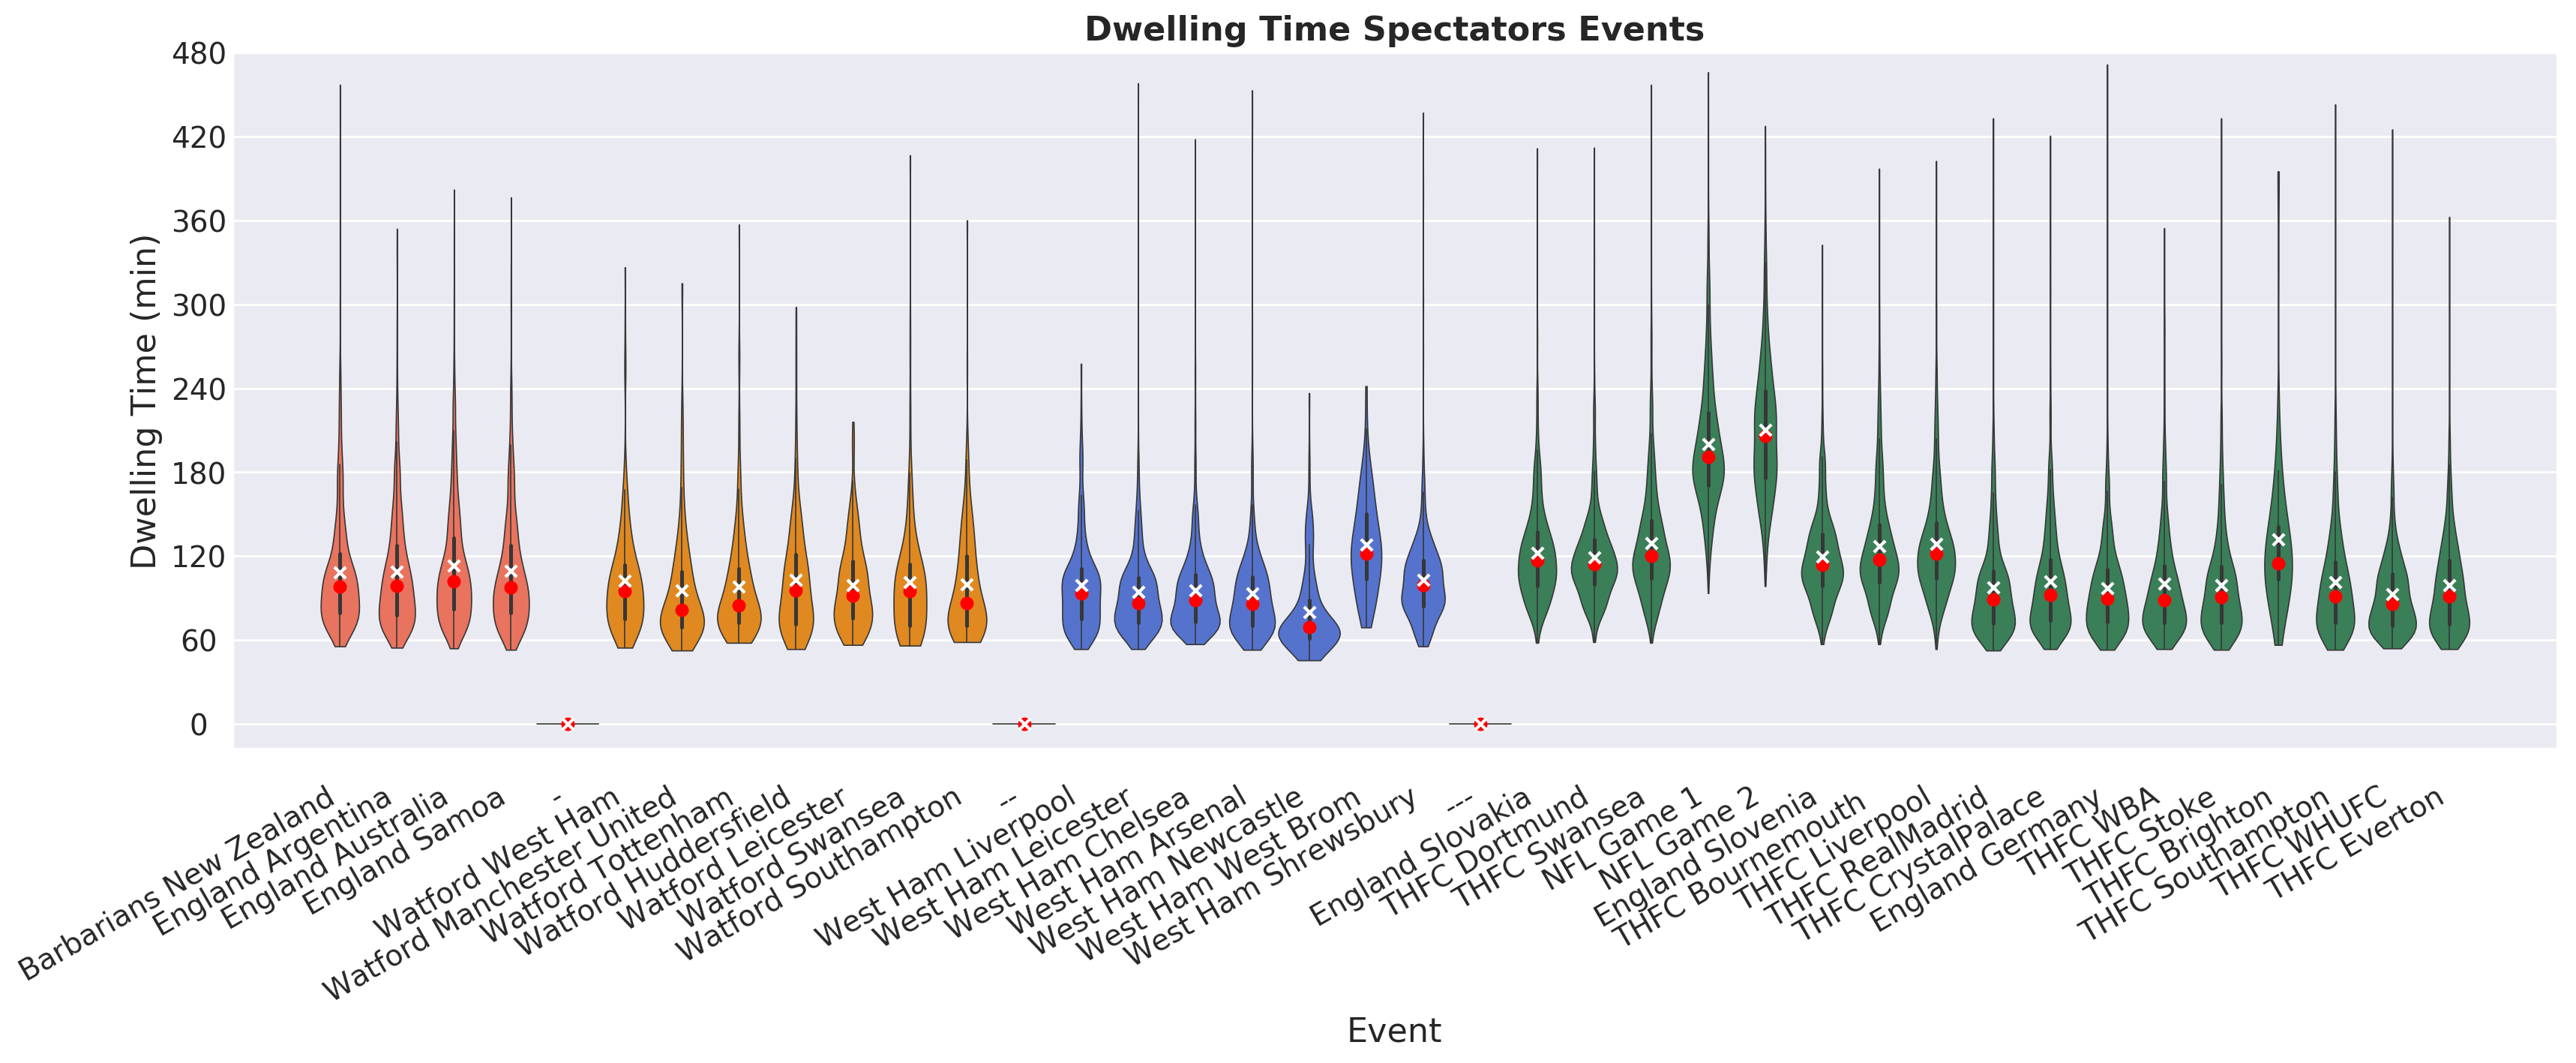

In [0]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8) ,dpi=200)
#f, ax = plt.subplots(figsize=(16, 8))

col_pal = ['tomato','tomato','tomato','tomato','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange',
           'royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen',
          'seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen']

sns.violinplot(new_data['event'], y=new_data['avg_dwelltime_min'], linewidth=0.6, width=1.08, cut=0, palette=col_pal)

plt.title('Dwelling Time Spectators Events', horizontalalignment='center', fontsize='16',fontweight='bold')
plt.xlabel('Event',fontsize='16', horizontalalignment='center')
plt.ylabel('Dwelling Time (min)',fontsize='16', horizontalalignment='center')
plt.xticks(rotation=30, horizontalalignment='right', fontsize='14')
plt.yticks(horizontalalignment='center', fontsize='14')

medians = median_list
means = means_list
inds = np.arange(1, len(medians) + 1)

ax.tick_params(axis='both', which='major', pad=10)
ax.scatter(event_list, medians, marker='o', color='red', s=30, zorder=3)
ax.scatter(event_list, means, marker='x', color='white', s=30, zorder=3)
#ax.set_yticks(np.arange(0,760,120))
ax.set_yticks(np.arange(0,500,60))

plt.subplots_adjust(bottom=0.30)

plt.savefig('drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/Graphs/graph_dwellingtime_event_type.png')

### Violin Plot for each event type and stadium venues

Event Type: Rugby, NFL, International football, Champions League, Premier League

Stadium Venue: London, Watford, Wembley, Twickenham

In [0]:
#import statistic table from bigquery
query = """ SELECT a.venue, a.event_type, a.avg_dwelltime_min, a.count_spectators, 
                             ROUND(((a.count_spectators/b.count_spect)*100),2) as perc_spectators
                 FROM (
                             SELECT a.venue, a.event_type, 
                                          ROUND(avg_dwelltime_min/1,0)*1 as avg_dwelltime_min, 
                                          COUNT(1) as count_spectators
                             FROM(  
                                           SELECT b.event_type, b.venue, a.eventid, a.avg_dwelltime_min
                                           FROM (
                                                       SELECT b.venueid, a.eventid, b.event, a.avg_dwelltime_min
                                                       FROM (
                                                                  SELECT DISTINCT eventid, user_id, avg_dwelltime_min
                                                                  FROM `thesisprojects2019.audeMS.step4_table4_dwellingtime_temporary4_area`) as a,
                                                                  `thesisprojects2019.audeMS.EDA_spectators` as b
                                                       WHERE a.eventid = b.eventid ) as a,
                                                       `thesisprojects2019.audeMS.stadia_event_classification` as b
                                           WHERE a.eventid = b.eventid 
                                           AND a.venueid = b.venueid AND a.event = b.event ) as a
                             GROUP BY venue, eventid, event_type, avg_dwelltime_min  ) as a
                 RIGHT JOIN `thesisprojects2019.audeMS.eventtype_count_spectators`as b
                 ON a.event_type = b.event_type AND a.venue = b.venue
                 ORDER BY venue, event_type, avg_dwelltime_min"""
data = client.query(query).to_dataframe()

In [0]:
#import statistic table from bigquery
#import statistic table from bigquery
query = """ SELECT eventid, venueid, event_type, venue, event, avg_dwelltime_min
                 FROM  `thesisprojects2019.audeMS.prediction_spectators_final`
                 ORDER BY venueid, eventid, avg_dwelltime_min """
data = client.query(query).to_dataframe()

In [0]:
data['venue_eventtype'] = data[['event_type', 'venue']].apply(lambda x: ' - '.join(x), axis=1)
data = data[data['avg_dwelltime_min']<= 480.0]
data.tail(2)

,eventid,venueid,event_type,venue,event,avg_dwelltime_min,venue_eventtype
38610,4_2018-01-13,4,Premier League,wembley stadium,THFC Everton,347.5,Premier League - wembley stadium
38611,4_2018-01-13,4,Premier League,wembley stadium,THFC Everton,362.5,Premier League - wembley stadium


In [0]:
data.groupby('venue_eventtype')['avg_dwelltime_min'].mean()

venue_eventtype
Champions League - wembley stadium          106.743147
International Football - wembley stadium    112.111850
NFL - wembley stadium                       204.193878
Premier League - london stadium              95.755675
Premier League - vicarage road               99.810519
Premier League - wembley stadium            111.607969
Rugby International - twickenham            110.173886
Name: avg_dwelltime_min, dtype: float64

In [0]:
means_list

[110.17388613861387,
 99.81051921780175,
 95.75567502986858,
 112.1118503640472,
 106.74314692982456,
 111.6079692466918,
 204.19387755102042]

In [0]:
venue_eventtype_list = []
for i in data.venue_eventtype:
    if i not in venue_eventtype_list:
        venue_eventtype_list.append(i)

median_list = []
for i in venue_eventtype_list:
    data_event = data.loc[data['venue_eventtype']==i]
    median_event = data_event.avg_dwelltime_min.median()
    median_list.append(median_event)
    
means_list = []
for i in venue_eventtype_list:
    data_event = data.loc[data['venue_eventtype']==i]
    mean_event = data_event.avg_dwelltime_min.mean()
    means_list.append(mean_event)

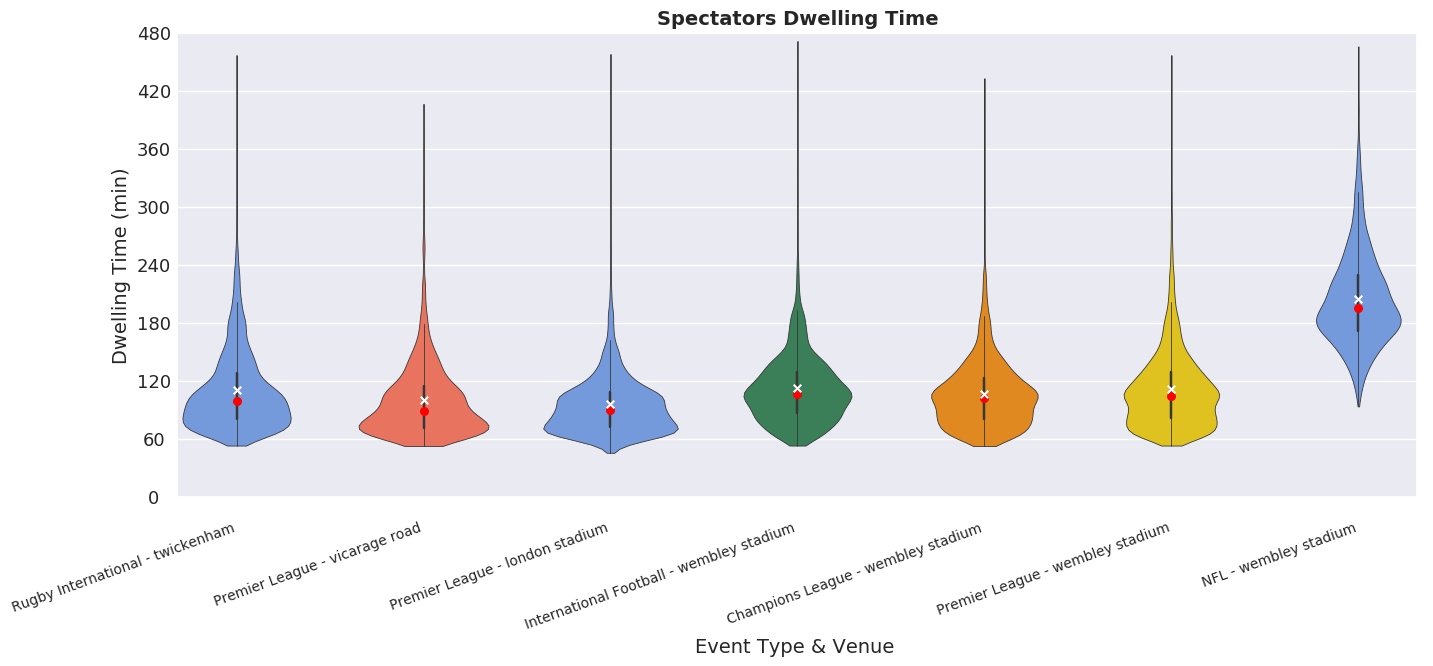

In [0]:
# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(16, 8) ,dpi=100)
#f, ax = plt.subplots(figsize=(12, 8))

col_pal =['cornflowerblue','tomato','cornflowerblue','seagreen','darkorange','gold','cornflowerblue']

sns.violinplot(data['venue_eventtype'], y=data['avg_dwelltime_min'], linewidth=0.6, width=0.72, cut=0, palette=col_pal)

plt.title('Spectators Dwelling Time', horizontalalignment='center', fontsize='14',fontweight='bold')
plt.xlabel('Event Type & Venue ',fontsize='14', horizontalalignment='center')
plt.ylabel('Dwelling Time (min)',fontsize='14', horizontalalignment='center')
plt.xticks(rotation=20, horizontalalignment='right', fontsize='10')
plt.yticks(horizontalalignment='center', fontsize='13')

medians = median_list
means = means_list
inds = np.arange(1, len(medians) + 1)

ax.tick_params(axis='both', which='major', pad=11)
ax.scatter(venue_eventtype_list, medians, marker='o', color='red', s=30, zorder=3)
ax.scatter(venue_eventtype_list, means, marker='x', color='white', s=30, zorder=3)
ax.set_yticks(np.arange(0,500,60))

plt.subplots_adjust(bottom=0.30)

plt.savefig('drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/Graphs/graph_dwelling_time_event_types_venues.png')